# Dataset Exploration

## Exploration of the [dataset](https://openneuro.org/datasets/ds001506/versions/1.3.1) used in my research project.

### **0.  Introduction**

This notebook serves the purpose of exploring the structure of the dataset. More precisely, there are two parts within this notebook. The first part will explore the BIDS format. This is done by using the [pybids](https://bids-standard.github.io/pybids/) module.
The second part will focus on exploring the anatomical and functional files for subject one, within the first session and first run. Next to files of anatomical and functional nature, the events and bold.json files of the respective subject are investigated.

Within the study of the respective dataset, the participants had two main tasks that are interesting for us in the fMRI. Task one was to simply look at visual stimuli (natural images, artifical shapes and alphabetical letters). Task two was to perform mental imagery, so visually imagine one of the presented stimuli. The imagination has been performed on either the natural images or the alphabetical letters. 

#### Example task

In the paradigm, two experiments were used. To make the paradigm more clear, I will provide a brief example on how a task in the visual stimuli and in the imagery experiment looks like. 

**Visual stimuli**

For the visual stimuli, or image presentation, experiment there were four distinct sessions. 1: Training of the natural images, 2. test of the natural images, artificial shape session and alphabetic letter sessions. For these sessions, each run compromised of 50, 50, 40 and 10 blocks with different images. Since we are mainly interested in the mental imagery part of the experiment, we will now introduce more thoroughly this respective condition. So the main stimuli were natural images, artificial shapes and alphabetic letters.

**Mental imagery**

As mentioned before, the subject had to recall one of the 25 visual stimuli from the natural images (10) and artificial shape session (15). The visual stimuli were related to a certain word, that helps them with the recall by using a word-cue. The imagery part consisted of 20 seperate runs, each run with 26 blocks. The 26 blocks were built from 25 imagery trials and one fixation trial. In the fixation trial no imagery was performed. 

The imagery trials looked like this: 4 seconds of word-cue, 8 seconds of imagery, 3 seconds of evalution (how vivid was the imagination) and one second rest period.
In the word-cue period, the respective words to indicate the visual stimuli were presented. The participants had to immediately perform the imagery after receiving the word-cue.

### **1. Exploration of the dataset with pybids**

#### Bids Validation
According to the BIDS validator from Openneuro.org the dataset follows a valid BIDS.

We want to understand the structure of the dataset, especially how the dataset follows the BIDS format. This can be done with the pybids module. The following part serves the purpose of determining the structure.
To explore the dataset, we will need to obtain it first from datalad. The installation of the dataset is  done by using the command *datalad install https: //github.com/ OpenNeuroDatasets/ds001506.git* in bash.

datalad install https://github.com/OpenNeuroDatasets/ds001506.git

Now we will create a path to where the data is stored and import all modules we need for know. This dataset_path can then be used to investigate the layout of the dataset.

In [1]:
dataset_path = '/home/jpauli/ds001506' 

In [2]:
from bids import BIDSLayout
from bids.tests import get_test_data_path
import os

In [3]:
layout = BIDSLayout(dataset_path)
layout 

BIDS Layout: .../home/jpauli/ds001506 | Subjects: 3 | Sessions: 77 | Runs: 36

<div class="alert alert-block alert-success">This dataset consists of three participants. Overall, there are 77 sessions and 36 runs.
Furthermore it is interesting to take a look at the amount of files in the dataset and the tasks that are done by the participants</div>

In [4]:
layout.get_tasks()

['imagery', 'perception']

<div class="alert alert-block alert-success">This simply validates the statement from the introduction block. The participants had to do two tasks: Tasks that rely on perception and tasks that rely on imagery.</div>

Also, it is possible to get the files of the subjects filtered by the task.

In [5]:
layout.get(subject='01', return_type='file', task="perception")[:10]

['/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-01_bold.json',
 '/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-01_bold.nii.gz',
 '/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-01_events.tsv',
 '/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-02_bold.json',
 '/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-02_bold.nii.gz',
 '/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-02_events.tsv',
 '/home/jpauli/ds001506/sub-01/ses-perceptionArtificialImage01/func/sub-01_ses-perceptionArtificialImage01_task-perception_run-03_bold.json',


<div class="alert alert-block alert-info">We can see, that we have three different file types for the perception tasks. 
bold.json, bold.nii.gz and events.tsv.

Also we see, that this is according to BIDS.</div>

In [6]:
layout.get(subject='01', return_type='file', task="imagery")[:10]

['/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_bold.json',
 '/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_bold.nii.gz',
 '/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_events.tsv',
 '/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-02_bold.json',
 '/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-02_bold.nii.gz',
 '/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-02_events.tsv',
 '/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-03_bold.json',
 '/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-03_bold.nii.gz',
 '/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-03_events.tsv',
 '/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-ima

..this is also true for the imagery task!

We can use the following command to get all entitites (=BIDS defined keywords) for our dataset. 

In [7]:
layout.get_entities() 

{'subject': <Entity subject (pattern=[/\\]+sub-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'session': <Entity session (pattern=[_/\\]+ses-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'sample': <Entity sample (pattern=[_/\\]+sample-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'task': <Entity task (pattern=[_/\\]+task-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'acquisition': <Entity acquisition (pattern=[_/\\]+acq-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'ceagent': <Entity ceagent (pattern=[_/\\]+ce-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'staining': <Entity staining (pattern=[_/\\]+stain-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'tracer': <Entity tracer (pattern=[_/\\]+trc-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'reconstruction': <Entity reconstruction (pattern=[_/\\]+rec-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'direction': <Entity direction (pattern=[_/\\]+dir-([a-zA-Z0-9]+), dtype=<class 'str'>)>,
 'run': <Entity run (pattern=[_/\\]+run-(\d+), dtype=<class 'bids.layout.utils.PaddedInt'>)>,
 'proc': <Enti

<div class="alert alert-block alert-success">
We encounter familiar entities: Subject, session, run and task. This command informs us about several other entities that are being used within the dataset and can be found in other files. For example, we will later encounter the entity "SliceTiming" in the event.tsv file of subject one, for the first session and the first run of the mental imagery task
</div>

Lets explore the file of subject 01 a bit more. We can assing the variable "sub1" to the fourth file of subject one, print it out and check the type of the file. This type can then be compared to the intial layout file!

In [8]:
sub1 = layout.get(subject=['01'])[3]

In [9]:
sub1

<BIDSImageFile filename='/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_bold.nii.gz'>

In [10]:
print("The type of this file is:")
type(sub1)

The type of this file is:


bids.layout.models.BIDSImageFile

In [11]:
print("The type of the intial layout file is:")
type(layout)

The type of the intial layout file is:


bids.layout.layout.BIDSLayout



<div class="alert alert-block alert-success">So we now do not have a BIDSLayout file anymore, but rather are dealing with a BIDSImageFile. This file in particular is the functional image taken for subject one, in the first session and run during the imagery task.</div>

We can now print the metadata associated with this particular file. This metadata is simply the associated .json file. We get information about the magnetic field or the repetition time. So all data related to the fMRI specifics.

In [12]:
sub1.get_metadata()

{'EchoTime': 0.043,
 'FlipAngle': 80.0,
 'MagneticFieldStrength': 3.0,
 'Manufacturer': 'SIEMENS',
 'ManufacturersModelName': 'Verio',
 'MultibandAccelerationFactor': 4,
 'RepetitionTime': 2.0,
 'SliceTiming': [0.0,
  1.0575,
  0.1075,
  1.1625,
  0.2125,
  1.2675,
  0.3175,
  1.375,
  0.4225,
  1.48,
  0.53,
  1.585,
  0.635,
  1.6925,
  0.74,
  1.7975,
  0.845,
  1.9025,
  0.9525,
  0.0,
  1.0575,
  0.1075,
  1.1625,
  0.2125,
  1.2675,
  0.3175,
  1.375,
  0.4225,
  1.48,
  0.53,
  1.585,
  0.635,
  1.6925,
  0.74,
  1.7975,
  0.845,
  1.9025,
  0.9525,
  0.0,
  1.0575,
  0.1075,
  1.1625,
  0.2125,
  1.2675,
  0.3175,
  1.375,
  0.4225,
  1.48,
  0.53,
  1.585,
  0.635,
  1.6925,
  0.74,
  1.7975,
  0.845,
  1.9025,
  0.9525,
  0.0,
  1.0575,
  0.1075,
  1.1625,
  0.2125,
  1.2675,
  0.3175,
  1.375,
  0.4225,
  1.48,
  0.53,
  1.585,
  0.635,
  1.6925,
  0.74,
  1.7975,
  0.845,
  1.9025,
  0.9525],
 'TaskName': 'imagery'}

The initial layout file can even be transformed into a *pandas dataframe* to get a rough overlook!

In [13]:
dataframe = layout.to_df()
dataframe

entity,path,datatype,extension,run,session,subject,suffix,task
0,/home/jpauli/ds001506/dataset_description.json,NaN,.json,NaN,NaN,NaN,description,NaN
1,/home/jpauli/ds001506/sub-01/ses-anatomy/anat/...,anat,.nii.gz,NaN,anatomy,01,T1w,NaN
2,/home/jpauli/ds001506/sub-01/ses-imagery01/ana...,anat,.nii.gz,NaN,imagery01,01,inplaneT2,NaN
3,/home/jpauli/ds001506/sub-01/ses-imagery01/fun...,func,.json,01,imagery01,01,bold,imagery
4,/home/jpauli/ds001506/sub-01/ses-imagery01/fun...,func,.nii.gz,01,imagery01,01,bold,imagery
...,...,...,...,...,...,...,...,...
1839,/home/jpauli/ds001506/sub-03/ses-perceptionNat...,func,.json,08,perceptionNaturalImageTraining15,03,bold,perception
1840,/home/jpauli/ds001506/sub-03/ses-perceptionNat...,func,.nii.gz,08,perceptionNaturalImageTraining15,03,bold,perception
1841,/home/jpauli/ds001506/sub-03/ses-perceptionNat...,func,.tsv,08,perceptionNaturalImageTraining15,03,events,perception
1842,/home/jpauli/ds001506/CHANGES,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After exploring the BIDS of the dataset, the anatomical and functional files of subject one will be explored.

### **2.0 Exploration of anatomical and functional files of subject one**

**First use the followings commands to inspect anatomical and function images and the event and json file of the functional session. Those files can be obtained from datalad. This allows me to install the respective files of subject one in the first session to inspect. The commands are exectued in *bash*.**


datalad get sub-01/ses-anatomy/anat/sub-01_ses-anatomy_T1w.nii.gz

datalad get sub-01/ses-imagery01/anat/sub-01_ses-imagery01_inplaneT2.nii.gz

datalad get sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_bold.json

datalad get sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_bold.nii.gz

datalad get sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_events.tsv

<div class="alert alert-block alert-success">Although the respective datalad get syntax is in the notebook, the .json and .tsv files were already loaded by the datalad *install* command (see "1.0"). This is because smaller files are obtained via datalad install, and larger ones via datalad get.
For information purpose, the respective commands are still in the cell above.</div>

First we will import the modules neccesary for inspecting the files. Also, we need to define the path to the respective files. We can then simply plot them with the "plot_anat" function from *nilearn*.

In [14]:
from nilearn.plotting import plot_stat_map, plot_anat, plot_img, show, plot_glass_brain

In [15]:
data_path_anat = '/home/jpauli/ds001506/sub-01/ses-anatomy/anat'
data_path_imagery_T2 = '/home/jpauli/ds001506/sub-01/ses-imagery01/anat'


In [16]:
anat_T1 = os.path.join(data_path_anat,'sub-01_ses-anatomy_T1w.nii.gz')
anat_T2 = os.path.join(data_path_imagery_T2 ,'sub-01_ses-imagery01_inplaneT2.nii.gz')

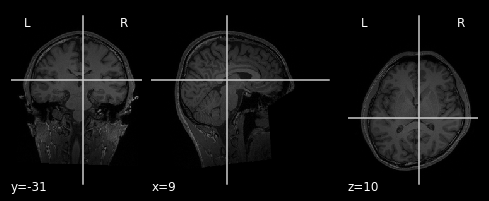

In [17]:
plot_anat(anat_T1)

/home/jpauli/miniconda3/envs/neuro_ai/lib/python3.7/site-packages/nilearn/image/resampling.py:545: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


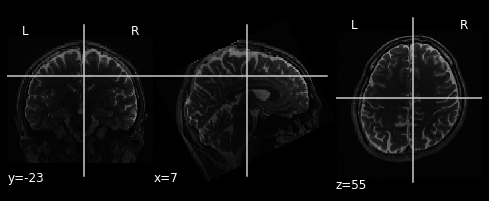

In [18]:
plot_anat(anat_T2)

We have two seperate images. The first plot is of the anatomical image of subject one. Important to note is, that we are looking at a T1 weighted image. This results in tissues, that are rich of fat, are highlighted.
The second plot is also a anatomical image, taken during the first imagery session of subject one. This is a T2 weighted image, meaning both fat *and* water is highlighted.

<div class="alert alert-block alert-success">
Now we will take a look at the functional image of subject one, within run and session one of the imagery condition. When dealing with functional images, we have four dimensions, so one dimension more than in the structural MRI. Common dimensions between both methods are x,y and z. *However* in functional images we are also dealing with the fourth dimension *time*. Thus, we need to take the mean img of the fMRI img. The mean_img() function can simply be imported from the nilearn module.</div>


In [19]:
path_func_img = '/home/jpauli/ds001506/sub-01/ses-imagery01/func' 

fmri_img = os.path.join(path_func_img ,'sub-01_ses-imagery01_task-imagery_run-01_bold.nii.gz')

In [20]:
from nilearn.image import mean_img 
mean_img = mean_img(fmri_img)

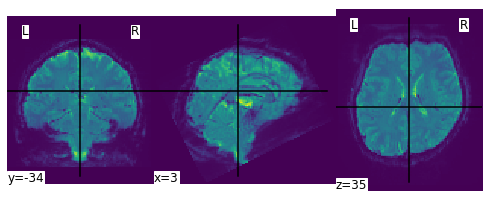

In [21]:
plot_img(mean_img)

### **2.1 Inspection of event file and meta data**

Now its time to inspect the events.tsv and the .json file. The event file tells us for example which stimuli (category_id) was presented at which timestamp (onset) and for how long (duration). The unit for this information is in seconds. Also the event file contains the column Evaluation. It runs from 5 (very) to 1 (could not recognize) and indicates how vivid the mental imagery was for the participants.



In [19]:
import pandas as pd
events=pd.read_csv('/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_events.tsv',sep='\t')

In [20]:
events

,onset,duration,trial_no,event_type,category_id,category_name,category_index,response_time,evaluation
0,0.0,32.0,1.0,-1,NaN,NaN,NaN,NaN,NaN
1,32.0,4.0,2.0,1,1976957.0,n01976957,7.0,44.967050,4.0
2,36.0,8.0,2.0,2,1976957.0,n01976957,7.0,44.967050,4.0
3,44.0,3.0,2.0,3,1976957.0,n01976957,7.0,44.967050,4.0
4,47.0,1.0,2.0,4,1976957.0,n01976957,7.0,44.967050,4.0
...,...,...,...,...,...,...,...,...,...
101,432.0,4.0,27.0,1,1943899.0,n01943899,6.0,445.498226,2.0
102,436.0,8.0,27.0,2,1943899.0,n01943899,6.0,445.498226,2.0
103,444.0,3.0,27.0,3,1943899.0,n01943899,6.0,445.498226,2.0
104,447.0,1.0,27.0,4,1943899.0,n01943899,6.0,445.498226,2.0


We are also interested in how many unique image categories were used in the experiment, so we use the following command to inspect this:

In [23]:
events.sort_values(by=['category_id'], inplace=True,ascending=True) #sort values, because values are also sorted in design matrix.
categories = events['category_id']
categories_no_nan = categories.dropna()

In [4]:
print('we are dealing with {} categories'.format(len(categories_no_nan.unique())))

we are dealing with 26 categories


<div class="alert alert-block alert-success">
It is useful to plot the behavior of the categories over time. This is demonstrated in the figure below.</div>

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [24]:
cat_string = [None]*106

for idx, x in enumerate(categories_no_nan):
    cat_string[idx] = str(x)
    

In [25]:
events['stimulus'] = cat_string

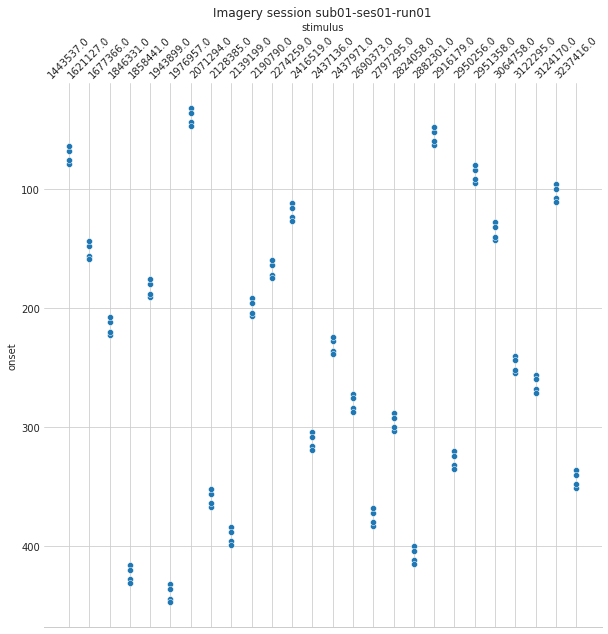

In [26]:
import seaborn as sns
plt.figure(figsize=(10,10))
g=sns.scatterplot(data=events, x='stimulus', y='onset')
sns.despine(left=True)
g.invert_yaxis()
g.xaxis.tick_top()
g.xaxis.set_label_position('top')
plt.xticks(rotation=45);
plt.title('Imagery session sub01-ses01-run01');

In [30]:
import json
with open('/home/jpauli/ds001506/sub-01/ses-imagery01/func/sub-01_ses-imagery01_task-imagery_run-01_bold.json') as json_file:
    json_data = json.load(json_file)
json_data   

{'Manufacturer': 'SIEMENS',
 'ManufacturersModelName': 'Verio',
 'MagneticFieldStrength': 3.0,
 'FlipAngle': 80.0,
 'EchoTime': 0.043,
 'RepetitionTime': 2.0,
 'SliceTiming': [0.0,
  1.0575,
  0.1075,
  1.1625,
  0.2125,
  1.2675,
  0.3175,
  1.375,
  0.4225,
  1.48,
  0.53,
  1.585,
  0.635,
  1.6925,
  0.74,
  1.7975,
  0.845,
  1.9025,
  0.9525,
  0.0,
  1.0575,
  0.1075,
  1.1625,
  0.2125,
  1.2675,
  0.3175,
  1.375,
  0.4225,
  1.48,
  0.53,
  1.585,
  0.635,
  1.6925,
  0.74,
  1.7975,
  0.845,
  1.9025,
  0.9525,
  0.0,
  1.0575,
  0.1075,
  1.1625,
  0.2125,
  1.2675,
  0.3175,
  1.375,
  0.4225,
  1.48,
  0.53,
  1.585,
  0.635,
  1.6925,
  0.74,
  1.7975,
  0.845,
  1.9025,
  0.9525,
  0.0,
  1.0575,
  0.1075,
  1.1625,
  0.2125,
  1.2675,
  0.3175,
  1.375,
  0.4225,
  1.48,
  0.53,
  1.585,
  0.635,
  1.6925,
  0.74,
  1.7975,
  0.845,
  1.9025,
  0.9525],
 'MultibandAccelerationFactor': 4,
 'TaskName': 'imagery'}


The json file tells us about the meta data associated with this file. This includes the manufacter, the signal strengh of the magnetic field in tesla, the slicing time and even the respective task name.

## **3.0 Datamanagment: Data modelling**

<div class="alert alert-block alert-success">
Next step: Run a GLM. The supervised modell takes the brain activity during the mental imagery and natural stimuli condition as an input. Thus I need to run an GLM with the predictors and dependent variable. The predictors are the respective categories of the stimuli. The dependent variable is the brain activity in a given voxel. This predicted activity will then serve as the input to the machine learning algorithm.

Please follow the jupyter book to continue.</div>